Two Masses
====

Coding
----

Physics
----

It is also relatively easy to model the motion of two masses on springs, depicted below:

![Two masses](img/two_masses.png)

The equations of motion describing this system are:

  $m\ddot{x}_1 = -kx_1 - \kappa(x_1 - x_2)$

  $m\ddot{x}_2 = -kx_2 - \kappa(x_2 - x_1)$


The symmetry of the system means that we can add these equations together to get a useful equation of "motion" for the combined co-ordinate $x_1 + x_2$:

  $m \frac{d^2}{dt^2}(x_1 + x_2) = -k(x_1 + x_2)$
  
We can also subtract them to find:

  $m \frac{d^2}{dt^2}(x_1 - x_2) = -(k + 2\kappa)(x_1 - x_2)$
  
 
This is in fact rather profound - it means that the two quantities $x_1 + x_2$ and $x_1 - x_2$ are always undergoing harmonic motion, no matter how random the overall bouncing back and forward seems to be. These are the normal modes of the system.

Let's take the case when the masses are both at rest, and $x_2(t=0) = 1$.
We can solve these equations analytically; for our case this turns out to be:

$x_1 + x_2 = 2A_+ cos(\omega_+t + \phi_+)$

$x_1 - x_2 = 2A_- cos(\omega_-t + \phi_-)$

Since we know how to solve them numerically, let's do that because its easier.

Let's say our initial conditions are:  
  $\dot{x}_1 = \dot{x}_2 = 0; x_1 = 0; x_2 = 1$.

In normal co-ordinates, this is:

  $x_+ \equiv x_1 + x_2 =1$  
  $x_- \equiv x_1 - x_2 = -1$.
    
Our 1st order coupled equations are:

  $\dot{x}_+ = v_+ \qquad \dot{x}_- = v_-$  
  $\dot{v}_+ = -\frac{k}{m}x_+ \quad\dot{v}_- = -\frac{k+2\kappa}{m}x_-$
  
We could solve these individually (and that would likely be the sensible thing to do here, since we have two independent systems of equations). However, it is enlightening to try and solve it all at once - we just need to put our equations in the right form, i.e. $\frac{d\mathbf{y}}{dt} = f(\mathbf{y})$, where $\mathbf{y}$ is our vector of co-ordinates. In our case:

$
  \frac{d}{dt}
  \begin{bmatrix}
  x_+\\
  x_-\\
  v_+\\
  v_-\\
  \end{bmatrix}
  =
  \begin{bmatrix}
  v_+\\
  v_-\\
  -\frac{k}{m}x_+\\
  -\frac{k+2\kappa}{m}x_-
  \end{bmatrix}
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Constants
k, kappa = 1.0, 3.0
m = 1.0
min_time, max_time, n_timesteps = 0.0, 10.0, 100
times = np.linspace(min_time, max_time, n_timesteps)

# Initial conditions
initial_positions = 1.0, -1.0
initial_velys = 0.0, 0.0

omega_plus = np.sqrt(k/m)
omega_minus = np.sqrt((k+2*kappa)/m)

min_time, max_time, n_timesteps = 0.0, 4.0*np.pi, 250
times = np.linspace(min_time, max_time, n_timesteps)


# This time params is (x+, x-, v+, v-)
def rhs(t, params):
    """
    Right hand sides of our equations
    
    """
    # Give names to our parameters to make everything easier to read
    x_plus, x_minus, v_plus, v_minus = params
    
    return v_plus, v_minus, -k*x_plus/m, -(k+2*kappa)*x_minus / m


solution = solve_ivp(rhs, [min_time, max_time], (*initial_positions, *initial_velys), t_eval=times)
numerical_x_plus = solution.y[0]
numerical_x_minus = solution.y[1]

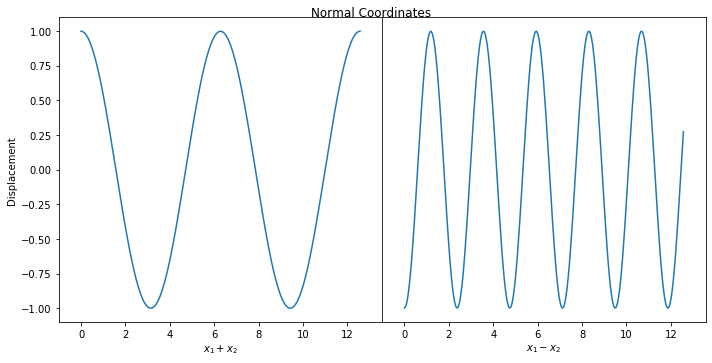

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# TODO note about magic numbers
labels = r"$x_1 + x_2$", r"$x_1 - x_2$"
for a, label in zip(ax, labels):
    a.set_xlabel(label)
    a.set_xlim(min_time-1, max_time+1)
ax[0].set_ylabel("Displacement")
ax[1].set_yticks([])
fig.suptitle("Normal Coordinates", position=(0.52, 1.0))

ax[0].plot(times, numerical_x_plus)
ax[1].plot(times, numerical_x_minus)


fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.show()

We can see that the normal modes undergo harmonic oscillation (this is what defines them).

It's perhaps more enlightening to plot the motion of each mass - this is easy to find:

$x_1 = \frac{x_+ + x_-}{2} \quad x_2 = \frac{x_+ - x_-}{2}$

In [3]:
numerical_x1 = (numerical_x_plus + numerical_x_minus) / 2
numerical_x2 = (numerical_x_plus - numerical_x_minus) / 2

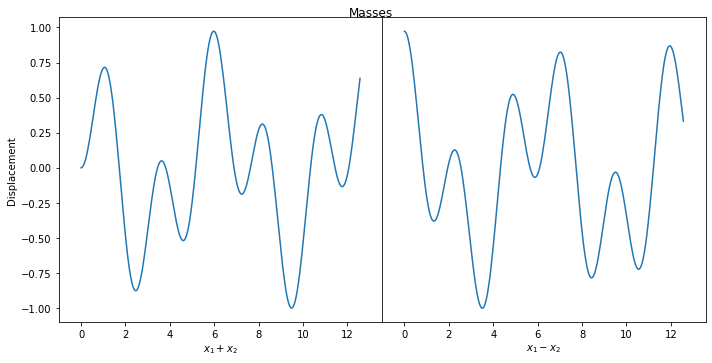

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

# TODO note about magic numbers
labels = r"$x_1 + x_2$", r"$x_1 - x_2$"
for a, label in zip(ax, labels):
    a.set_xlabel(label)
    a.set_xlim(min_time-1, max_time+1)
ax[0].set_ylabel("Displacement")
ax[1].set_yticks([])
fig.suptitle("Masses", position=(0.52, 1.0))

ax[0].plot(times, numerical_x1)
ax[1].plot(times, numerical_x2)


fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.show()

This is fine, but really what you want to see is an animation:

<IPython.core.display.Javascript object>


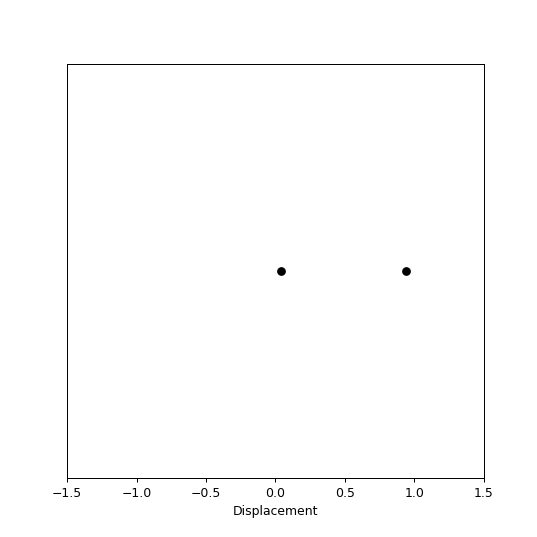

In [5]:
from matplotlib.animation import FuncAnimation

%matplotlib notebook
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Some plot settings
ax.set_xlabel("Displacement")
ax.set_yticks([])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1, 1)

x1, = ax.plot([], [], "ko")
x2, = ax.plot([], [], "ko")

def init():
    x1.set_data([], [])
    x2.set_data([], [])
    return x1, x2

def animate(i):
    x1.set_data(numerical_x1[i], 0)
    x2.set_data(numerical_x2[i], 0)
    return x1, x2


# Now we are ready to create our Animation object- this is the easiest way to make animations in matplotlib
# The blit keyword tells matplotlib to only update the parts of the plot which change between frames
anim = FuncAnimation(
    fig, animate, init_func=init, frames=n_timesteps, interval=20, blit=True
)